In [1]:
import pandas as pd
import numpy as np
from ak_pynn.mlp import MLP

## Testing ANN on Regression

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("./datasets/heart_data.csv")
df.head()
X_train, X_test, Y_train, Y_test = train_test_split(
    df.iloc[:, 0:2].values, df.iloc[:, 2].values, test_size=0.3,random_state=2)



                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear       (None, 2)          0       
        -------------------------------------------------------------------

               Dense             linear       (None, 10)         30      
        -------------------------------------------------------------------

               Dense             linear       (None, 10)        110      
        -------------------------------------------------------------------

               Output            linear       (None, 1)          11      
        -------------------------------------------------------------------


        Total Params  - 151
        Trainable Params  - 151
        Non-Trainable Params  - 0
        ___________________________________________________________________
        


Training progress :: 100%|██████████| 100/100 [00:00<00:00, 233.43it/s, Loss: 1.41448 - mse: 1.41448] 



Minimised Loss : 1.41448361, Training metrics : {'mse': 1.41448361} 

Training complete!! , Average Elapse-Time (per epoch) : 0.00289 seconds
========================================================================= :)


0.9629854685941663

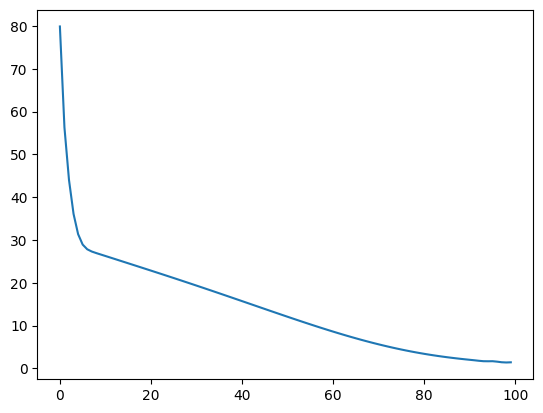

In [5]:
from sklearn.metrics import r2_score
model = MLP()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='linear')
model.add_layer(10,activation_function='linear')
model.add_layer(1,activation_function='linear',output_layer=True)
model.compile_model(loss_function='mse')
losses=model.fit(X_train, Y_train,epochs=100,verbose=False)
Y_pred = model.predict(X_test)
plt.plot(model.history['Losses'])
r2_score(Y_test,Y_pred)

## Testing Keras ANN on Regression

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 2ms/step


0.9637272709239455

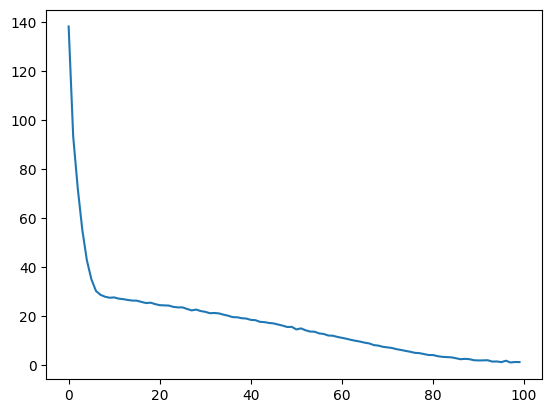

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='linear', input_dim=2))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=100,verbose=0)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
r2_score(Y_test, Y_pred)


## Testing ANN on Classification

In [7]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("./datasets/placement.csv")
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trns = scaler.fit_transform(df.iloc[:, 0:2])
df = pd.DataFrame(
    {'cgpa': trns[:, 0], 'iq': trns[:, 1], 'placement': df['placement']})
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,0:2].values, df.iloc[:,2].values, test_size=0.2,random_state=2)



                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear       (None, 2)          0       
        -------------------------------------------------------------------

               Dense             linear       (None, 10)         30      
        -------------------------------------------------------------------

               Dense             linear       (None, 10)        110      
        -------------------------------------------------------------------

               Output           sigmoid       (None, 1)          11      
        -------------------------------------------------------------------


        Total Params  - 151
        Trainable Params  - 151
        Non-Trainable Params  - 0
        ___________________________________________________________________
        


Training progress :: 100%|██████████| 100/100 [00:00<00:00, 200.54it/s, Loss: 0.04364 - mse: 0.04364]



Minimised Loss : 0.04364112, Training metrics : {'mse': 0.04364112} 

Training complete!! , Average Elapse-Time (per epoch) : 0.00296 seconds
========================================================================= :)


0.85

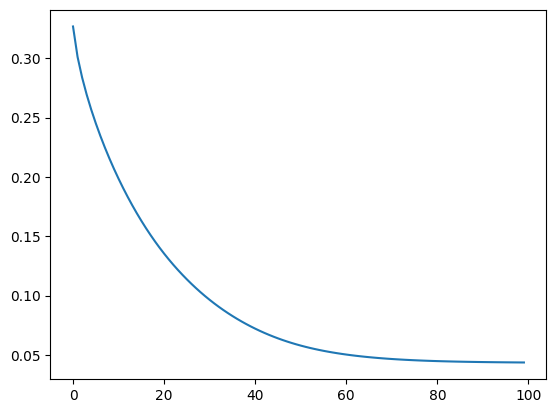

In [11]:
from sklearn.metrics import accuracy_score
model = MLP()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='linear')
model.add_layer(10,activation_function='linear')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.compile_model(loss_function='mse')
losses=model.fit(X_train, Y_train,epochs=100,verbose=False,early_stopping=False)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

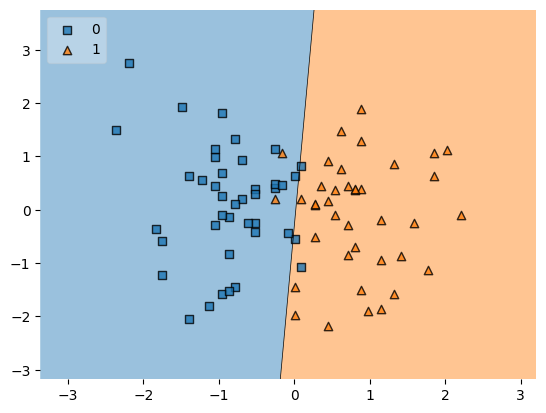

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)


                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear       (None, 2)          0       
        -------------------------------------------------------------------

               Dense             linear       (None, 10)         30      
        -------------------------------------------------------------------

               Dense             linear       (None, 10)        110      
        -------------------------------------------------------------------

               Output           sigmoid       (None, 1)          11      
        -------------------------------------------------------------------


        Total Params  - 151
        Trainable Params  - 151
        Non-Trainable Params  - 0
        ___________________________________________________________________
        


Training progress :: 100%|██████████| 50/50 [00:00<00:00, 233.13it/s, Loss: 0.16631 - mse: 0.04738]


Minimised Loss : 0.16631480, Training metrics : {'mse': 0.04737558} 

Training complete!! , Average Elapse-Time (per epoch) : 0.00257 seconds
========================================================================= :)


0.9

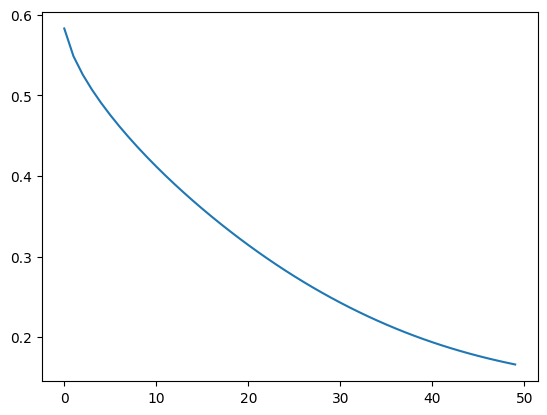

In [15]:
from sklearn.metrics import accuracy_score
model = MLP()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='linear')
model.add_layer(10,activation_function='linear')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.compile_model(loss_function='binary_cross_entropy')
losses=model.fit(X_train, Y_train,epochs=50,verbose=False,early_stopping=False)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

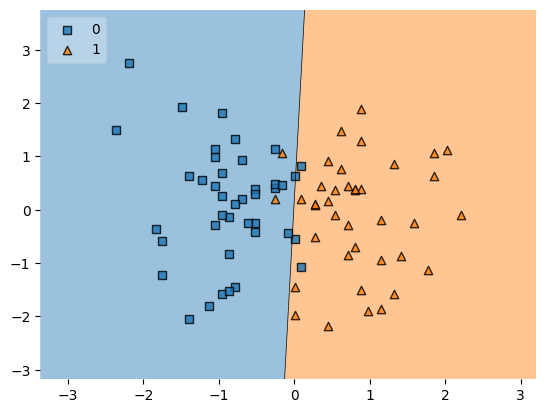

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)

## Testing Keras ANN on Classification

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 75ms/step


0.9

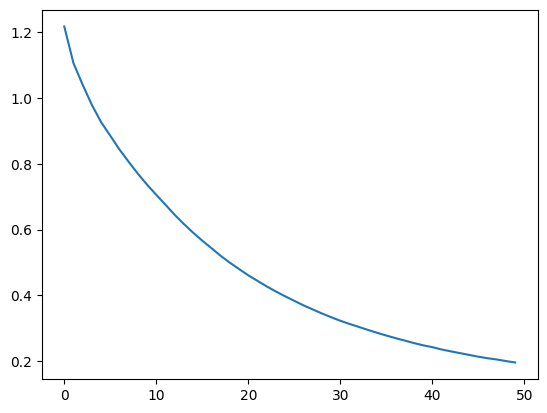

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization
model = Sequential()
initializer = keras.initializers.GlorotUniform(seed=3)
model.add(Dense(10, activation='linear', input_dim=2,kernel_initializer=initializer))
model.add(Dense(10, activation='linear',kernel_initializer=initializer))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializer))
model.compile(loss='BinaryCrossentropy', metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=50,verbose=0)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(history.history['loss'])
accuracy_score(Y_test, Y_pred)


9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot:>

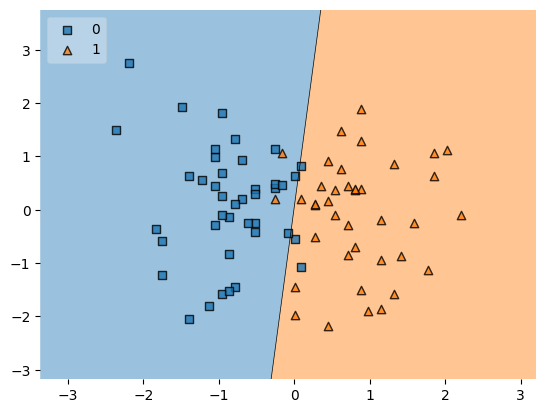

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)

## Testing ANN on make_moons

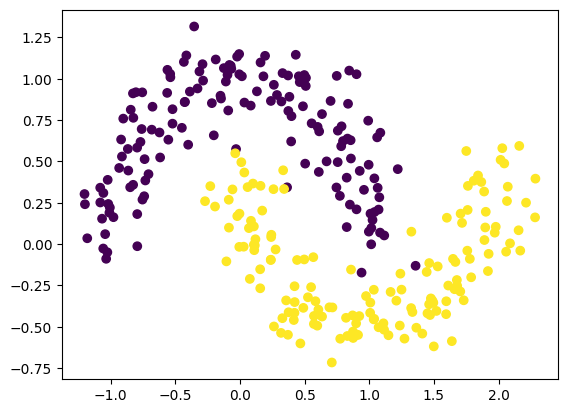

In [19]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=300,noise=0.15)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)
plt.scatter(X[:,0],X[:,1],c=Y)


                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear       (None, 2)          0       
        -------------------------------------------------------------------

               Dense              relu        (None, 30)         90      
        -------------------------------------------------------------------

               Dense              relu        (None, 30)        930      
        -------------------------------------------------------------------

               Output           sigmoid       (None, 1)          31      
        -------------------------------------------------------------------


        Total Params  - 1051
        Trainable Params  - 1051
        Non-Trainable Params  - 0
        ___________________________________________________________________
        


Training progress :: 100%|██████████| 200/200 [00:01<00:00, 112.30it/s, Loss: 0.01299 - mse: 0.01299]



Minimised Loss : 0.01298736, Training metrics : {'mse': 0.01298736} 

Training complete!! , Average Elapse-Time (per epoch) : 0.00661 seconds
========================================================================= :)


0.9833333333333333

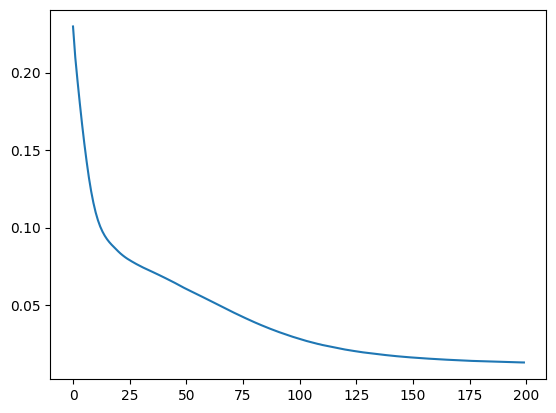

In [24]:
from sklearn.metrics import accuracy_score
model = MLP()
model.add_layer(2,input_layer=True)
model.add_layer(30,activation_function='relu')
model.add_layer(30,activation_function='relu')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.compile_model(loss_function='mse',weight_initializer='glorot_uniform',seed=3)
losses=model.fit(X_train, Y_train,epochs=200,verbose=False,early_stopping=True,patience=3)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

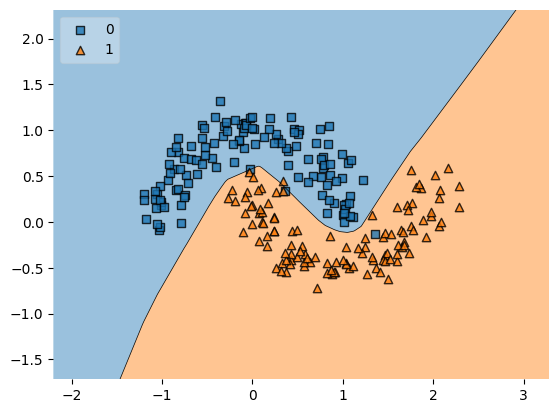

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)

## Testing ANN on make_circles

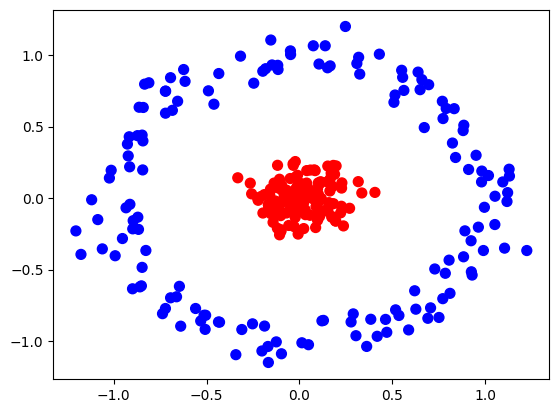

In [26]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X,Y = make_circles(300, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='bwr')


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)


                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear       (None, 2)          0       
        -------------------------------------------------------------------

               Dense              relu        (None, 10)         30      
        -------------------------------------------------------------------

               Dense              relu        (None, 10)        110      
        -------------------------------------------------------------------

               Output           sigmoid       (None, 1)          11      
        -------------------------------------------------------------------


        Total Params  - 151
        Trainable Params  - 151
        Non-Trainable Params  - 0
        ___________________________________________________________________
        


Training progress :: 100%|██████████| 300/300 [00:02<00:00, 106.73it/s, Loss: 0.00003 - mse: 0.00003 - precision: 1.00000 - macro_recall: 1.00000]



Minimised Loss : 0.00003388, Training metrics : {'mse': 3.388e-05, 'precision': 0.99999999, 'macro_recall': 0.99999999} 

Training complete!! , Average Elapse-Time (per epoch) : 0.00742 seconds
========================================================================= :)


1.0

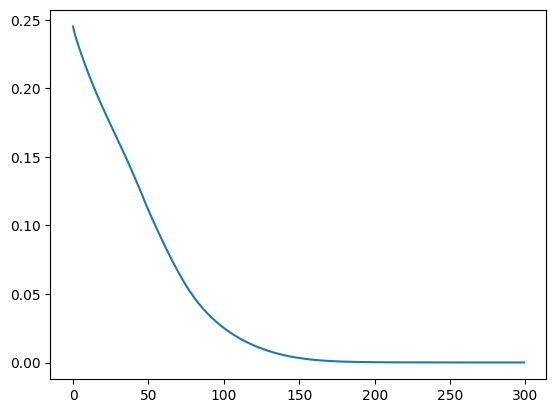

In [29]:
from sklearn.metrics import accuracy_score
model = MLP()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='relu')
model.add_layer(10,activation_function='relu')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.compile_model(loss_function='mse',weight_initializer='glorot_uniform',seed=3,metrics=['mse','precision','macro_recall'])
losses=model.fit(X_train, Y_train,epochs=300,verbose=False,early_stopping=True,patience=3)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

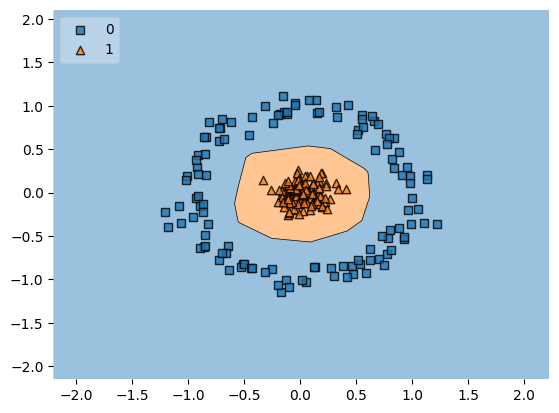

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)